In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import datetime, date

In [202]:
df = pd.read_csv("HRDataSet.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [203]:
df.DOB.head()

0    7/10/1983
1     5/5/1975
2    9/19/1988
3    9/27/1988
4     9/8/1989
Name: DOB, dtype: object

In [204]:
df.DOB[0]
type(df.DOB[0])

str

In [205]:
df.DOB=pd.to_datetime(df.DOB).dt.date
df.DOB.head()

0    1983-07-10
1    1975-05-05
2    1988-09-19
3    1988-09-27
4    1989-09-08
Name: DOB, dtype: object

In [206]:
type(df.DOB[0])

datetime.date

In [207]:
df.DateofHire=pd.to_datetime(df.DateofHire).dt.date
df.DateofHire.head()

0    2011-07-05
1    2015-03-30
2    2011-07-05
3    2008-01-07
4    2011-07-11
Name: DateofHire, dtype: object

In [208]:
type(df.DateofHire[0])

datetime.date

In [209]:
# extracting the year from the Date of Hire
df['year'] = pd.DatetimeIndex(df['DateofHire']).year
display(df.year)

0      2011
1      2015
2      2011
3      2008
4      2011
       ... 
306    2014
307    2008
308    2010
309    2015
310    2014
Name: year, Length: 311, dtype: int64

In [210]:
# This function converts given date to age
def calculate_tenure(hire_date):
    today = date.today()
    return today.year - hire_date.year - ((today.month, 
                                      today.day) < (hire_date.month, 
                                                    hire_date.day))
  
df['Tenure'] = df['DateofHire'].apply(calculate_tenure)
  
display(df.Tenure)

0      11
1       7
2      11
3      14
4      11
       ..
306     8
307    13
308    12
309     7
310     7
Name: Tenure, Length: 311, dtype: int64

In [211]:
  
# This function converts given date to age
def calculate_age(born_date):
    today = date.today()
    return today.year - born_date.year - ((today.month, 
                                      today.day) < (born_date.month, 
                                                    born_date.day))
  
df['Age'] = df['DOB'].apply(calculate_age)
  
display(df.Age)

0      39
1      47
2      33
3      33
4      32
       ..
306    37
307    40
308    42
309    43
310    43
Name: Age, Length: 311, dtype: int64

In [212]:
df[['Age','Salary','Absences']].mean()

Age            42.938907
Salary      69020.684887
Absences       10.237942
dtype: float64

In [213]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'year', 'Tenure', 'Age'],
      dtype='object')

In [214]:
df.Age.groupby(df.Sex).agg(['mean','count'])

,mean,count
Sex,,
F,43.051136,176
M,42.792593,135


In [215]:
df.groupby(df.Sex).agg(mean_age=('Age','mean'),mean_salary=("Salary","mean"),mean_tenure=('Tenure','mean'),count_gender=('Sex','count'))

,mean_age,mean_salary,mean_tenure,count_gender
Sex,,,,
F,43.051136,67786.727273,9.102273,176
M,42.792593,70629.400000,8.866667,135


In [216]:
df.groupby(['Sex', 'EmploymentStatus']).Sex.agg(['count'])


count
Sex EmploymentStatus             
F   Active                    116
    Terminated for Cause        9
    Voluntarily Terminated     51
M   Active                     91
    Terminated for Cause        7
    Voluntarily Terminated     37

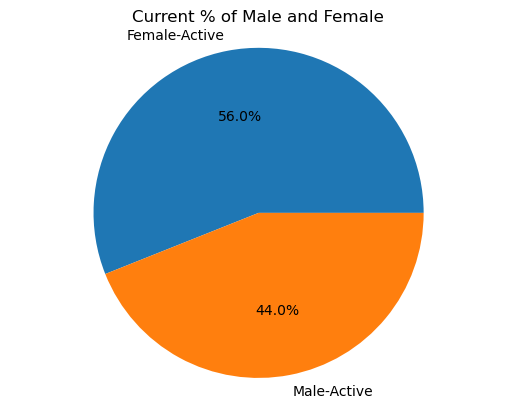

In [217]:
Tasks = [116,91]

my_labels = 'Female-Active','Male-Active'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Current % of Male and Female')
plt.axis('equal')
plt.show()

Analysis: Company currently have more females than males active. 

In [218]:
df.groupby(['Sex', 'EmploymentStatus']).Salary.agg(['mean'])


mean
Sex EmploymentStatus                    
F   Active                  70215.568966
    Terminated for Cause    72929.222222
    Voluntarily Terminated  61354.803922
M   Active                  71303.945055
    Terminated for Cause    78267.857143
    Voluntarily Terminated  67525.270270

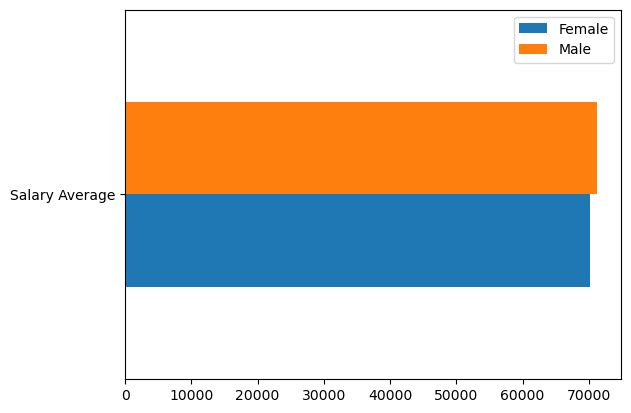

In [219]:
# Define Data

data = {'Female': [70215.5],
        'Male': [71303.9] }
df = pd.DataFrame(data,columns=['Female','Male'], index = ['Salary Average',])

# Multiple horizontal bar chart

df.plot.barh()

# Display

plt.show()

Analysis: Males have higher average salary than females. 
##pergunta: como eu adiciono label no grafico?